In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from file_utils import load_questions_from_file
from metric_utils import calculate_diversity

otdbFiles = ["OTDB_HISTORY.json", "OTDB_GENERAL_KNOWLEDGE.json", "OTDB_SCIENCE_NATURE.json"]
gpt4oFiles = ["GPT4o_HISTORY_PROMT1.json", "GPT4o_GENERAL_KNOWLEDGE_PROMT1.json", "GPT4o_SCIENCE_NATURE_PROMT1.json"]

data = {
    "Category": [],
    "OTDB Diversity": [],
    "GPT4o Diversity": [],
}

for file_list, source in zip([otdbFiles, gpt4oFiles], ["OTDB", "GPT4o"]):
    for file in file_list:
        questions = load_questions_from_file(file)
        category = file.split("_")[1].replace(".json", "").replace("_", " ")

        questions_text = [q.question for q in questions]

        diversity = calculate_diversity(questions_text)

        data["Category"].append(category)
        if source == "OTDB":
            data["OTDB Diversity"].append(diversity)
            data["GPT4o Diversity"].append(None)
        else:
            data["GPT4o Diversity"].append(diversity)
            data["OTDB Diversity"].append(None)

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))

df.plot(kind="bar", x="Category", y=["OTDB Diversity", "GPT4o Diversity"], ax=ax, stacked=False)

plt.title("Diversity Comparison by Category")
plt.xlabel("Category")
plt.ylabel("Diversity Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Diversity

I tried to use the inverse of the cosines similarity to compare the diversity of both datasets by category. Maybe just the scaling is wrong, as there is a slight higher diversity in the OTDB data. But to showcase, this isn't too nice.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

questions = [
    "What is the capital of France?",
    "What is the largest country in the world?",
    "Who was the first president of the United States?",
    "Which planet is known as the Red Planet?"
]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(questions)

cosine_sim = cosine_similarity(tfidf_matrix)

print("Cosine Similarity Matrix:")
print(cosine_sim)

Cosine Similarity Matrix:
[[1.         0.32120806 0.21204503 0.11648721]
 [0.32120806 1.         0.15858825 0.13064444]
 [0.21204503 0.15858825 1.         0.06657367]
 [0.11648721 0.13064444 0.06657367 1.        ]]


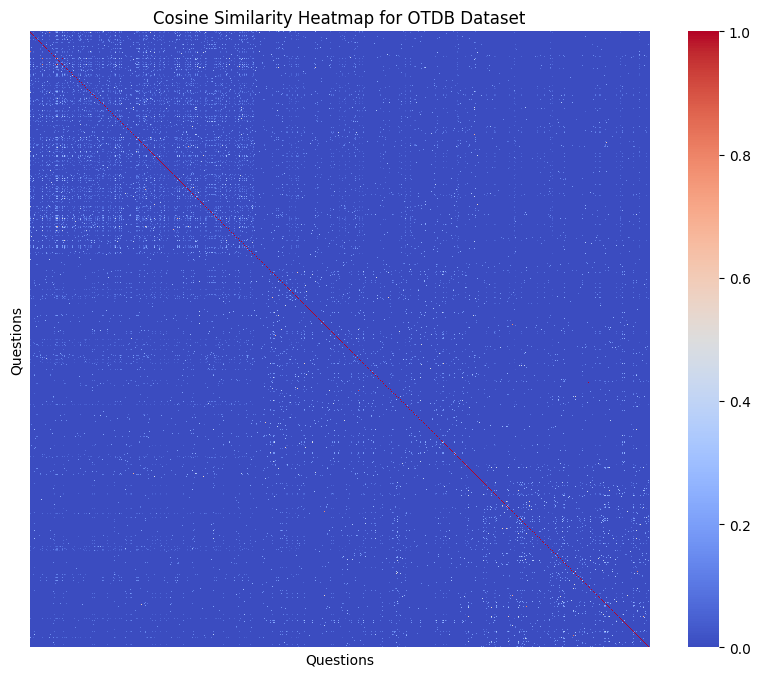

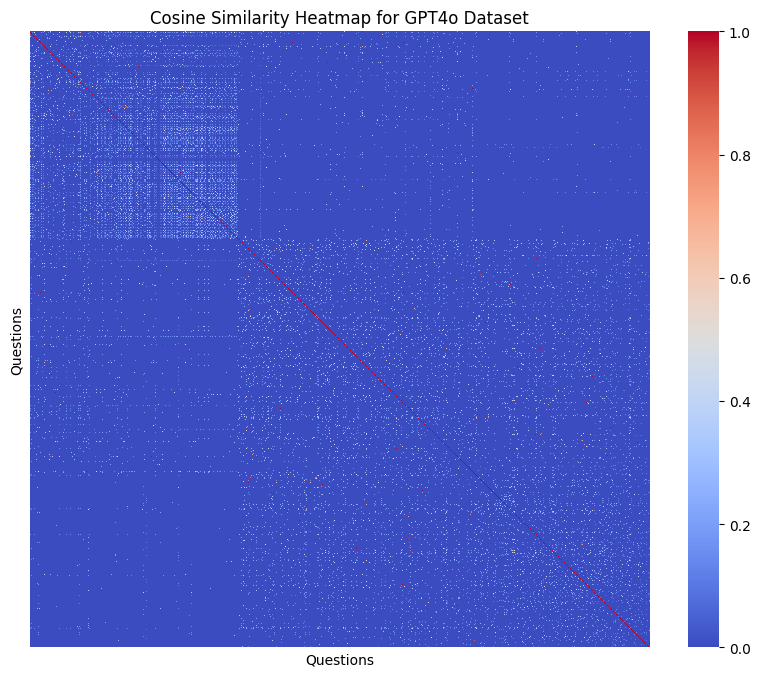

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from file_utils import load_questions_from_file
otdb_files = ["OTDB_HISTORY.json", "OTDB_GENERAL_KNOWLEDGE.json", "OTDB_SCIENCE_NATURE.json"]
gpt4o_files = ["GPT4o_HISTORY_PROMT1.json", "GPT4o_GENERAL_KNOWLEDGE_PROMT1.json", "GPT4o_SCIENCE_NATURE_PROMT1.json"]

def calculate_cosine_similarity_for_files(files):
    all_questions = []
    for file in files:
        questions = load_questions_from_file(file)
        for question in questions:
            all_questions.append(question.question)

    # Use TfidfVectorizer to convert the questions' text into vectors
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(all_questions)

    # Calculate the cosine similarity matrix
    similarity_matrix = cosine_similarity(tfidf_matrix)
    return similarity_matrix


otdb_similarity_matrix = calculate_cosine_similarity_for_files(otdb_files)
gpt4o_similarity_matrix = calculate_cosine_similarity_for_files(gpt4o_files)

def plot_similarity_heatmap(similarity_matrix, dataset_name):
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, annot=False, cmap="coolwarm", xticklabels=False, yticklabels=False)
    plt.title(f"Cosine Similarity Heatmap for {dataset_name}")
    plt.xlabel("Questions")
    plt.ylabel("Questions")
    plt.show()

# Plot heatmaps for both datasets
plot_similarity_heatmap(otdb_similarity_matrix, "OTDB Dataset")
plot_similarity_heatmap(gpt4o_similarity_matrix, "GPT4o Dataset")

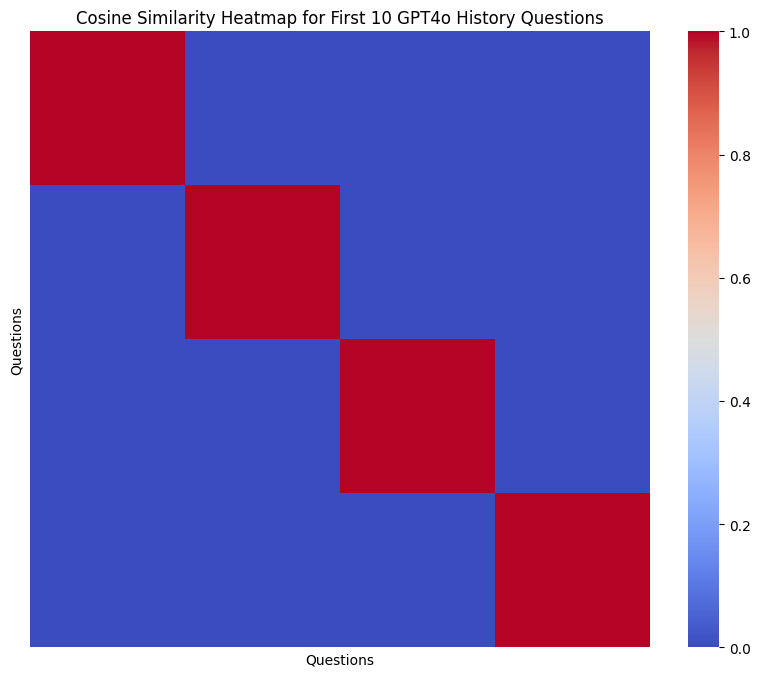

In [19]:
otdb_file = "GPT4o_HISTORY_PROMT1.json"
otdb_question = load_questions_from_file(otdb_file)

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(questions)

# Compute the cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, annot=False, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity Heatmap for First 10 GPT4o History Questions")
plt.xlabel("Questions")
plt.ylabel("Questions")
plt.show()


In the cosine similarity heatmap, blue represents low similarity between questions, meaning the questions are quite different from each other. Red indicates high similarity, meaning the questions are very similar to one another. White spots show medium-level similarity. Most of the questions in both datasets are shown in blue, which means there is a lot of diversity in the questions, and they are not very similar to one another. The red spots along the diagonal show that each question is similar to itself.

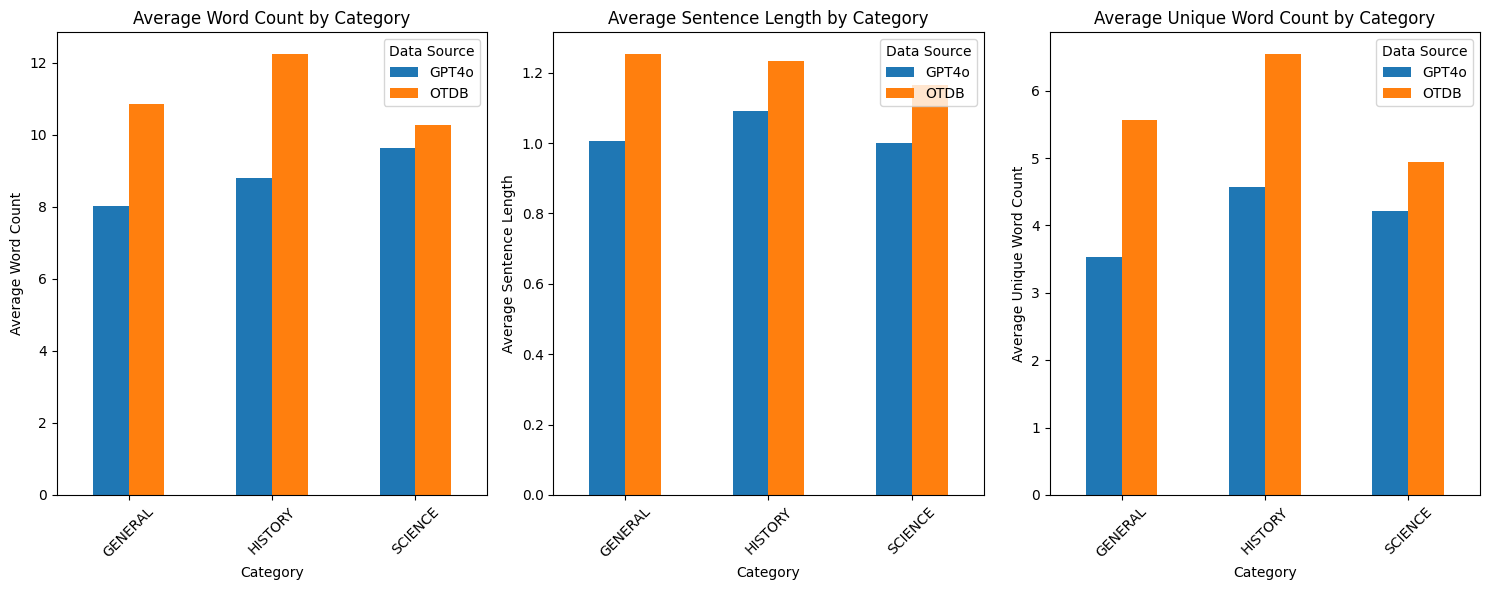

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from file_utils import load_questions_from_file
from metric_utils import calculate_word_count_and_sentence_length
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

# Define a function to calculate unique words in the dataset
def calculate_unique_words(questions):
    all_words = []
    for question in questions:
        # Tokenize the question text (remove punctuation and split by spaces)
        words = re.findall(r'\b\w+\b', question.lower())
        # Remove stop words
        filtered_words = [word for word in words if word not in ENGLISH_STOP_WORDS]
        all_words.extend(filtered_words)
    return len(set(all_words))  # Return the number of unique words

# Define your file lists
otdb_files = ["OTDB_HISTORY.json", "OTDB_GENERAL_KNOWLEDGE.json", "OTDB_SCIENCE_NATURE.json"]
gpt4o_files = ["GPT4o_HISTORY_PROMT1.json", "GPT4o_GENERAL_KNOWLEDGE_PROMT1.json", "GPT4o_SCIENCE_NATURE_PROMT1.json"]

# Initialize data storage
data = {
    "Category": [],
    "Word Count": [],
    "Sentence Length": [],
    "Unique Word Count": [],
    "Data Source": []  # OTDB or GPT4o
}

# Loop over files for both datasets
for file_list, source in zip([otdb_files, gpt4o_files], ["OTDB", "GPT4o"]):
    for file in file_list:
        questions = load_questions_from_file(file)
        category = file.split("_")[1].replace(".json", "").replace("_", " ")

        total_word_count = 0
        total_sentence_length = 0
        total_unique_word_count = 0
        question_count = len(questions)

        for question in questions:
            word_count, sentence_length = calculate_word_count_and_sentence_length(question.question)
            total_word_count += word_count
            total_sentence_length += sentence_length
            total_unique_word_count += calculate_unique_words([question.question])

        # Calculate average word count, sentence length, and unique word count
        avg_word_count = total_word_count / question_count
        avg_sentence_length = total_sentence_length / question_count
        avg_unique_word_count = total_unique_word_count / question_count

        # Append the data
        data["Category"].append(category)
        data["Word Count"].append(avg_word_count)
        data["Sentence Length"].append(avg_sentence_length)
        data["Unique Word Count"].append(avg_unique_word_count)
        data["Data Source"].append(source)

# Convert the aggregated data into a pandas DataFrame
df = pd.DataFrame(data)

# Plotting the results
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Plot the Word Count bar chart
df_pivot_word_count = df.pivot_table(index="Category", columns="Data Source", values="Word Count", aggfunc='mean')
df_pivot_word_count.plot(kind="bar", ax=axes[0], stacked=False)
axes[0].set_title("Average Word Count by Category")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Average Word Count")
axes[0].tick_params(axis='x', rotation=45)

# Plot the Sentence Length bar chart
df_pivot_sentence_length = df.pivot_table(index="Category", columns="Data Source", values="Sentence Length", aggfunc='mean')
df_pivot_sentence_length.plot(kind="bar", ax=axes[1], stacked=False)
axes[1].set_title("Average Sentence Length by Category")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Average Sentence Length")
axes[1].tick_params(axis='x', rotation=45)

# Plot the Unique Word Count bar chart
df_pivot_unique_word_count = df.pivot_table(index="Category", columns="Data Source", values="Unique Word Count", aggfunc='mean')
df_pivot_unique_word_count.plot(kind="bar", ax=axes[2], stacked=False)
axes[2].set_title("Average Unique Word Count by Category")
axes[2].set_xlabel("Category")
axes[2].set_ylabel("Average Unique Word Count")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# NEED to restructure the whole output of the notebook. That average word count and stence lenght is already in the sheet before